In [1]:
import matplotlib.pyplot as plt
import numpy as np

from models import TransformerModelLRLooped, TransformerModelLooped
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10

In [9]:
model_loop_b5 = TransformerModelLRLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0])

metrics_l1_b5 = train_without_config(
    model_loop_b5, cirriculum_b5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 4.475816249847412: 100%|██████████| 15000/15000 [09:21<00:00, 26.73it/s] 


In [10]:
model_loop_b5_st = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5_st = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [2000, 5, 0])

metrics_l1_b5_st = train_without_config(
    model_loop_b5_st, cirriculum_b5_st, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.20M


loss 9.894474029541016:   0%|          | 3/15000 [00:00<11:31, 21.68it/s]

0


loss 4.122859477996826: 100%|██████████| 15000/15000 [09:09<00:00, 27.28it/s] 


In [16]:
model_loop_b10 = TransformerModelLRLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10 = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [2000, 10, 0])

metrics_l1_b10 = train_without_config(
    model_loop_b10, cirriculum_b10, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.267543315887451: 100%|██████████| 15000/15000 [16:50<00:00, 14.84it/s] 


In [17]:
model_loop_b10_st = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10_st = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [2000, 10, 0])

metrics_l1_b10_st = train_without_config(
    model_loop_b10_st, cirriculum_b10_st, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 4.178284168243408: 100%|██████████| 15000/15000 [16:38<00:00, 15.02it/s] 


In [21]:
model_loop_b15 = TransformerModelLRLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b15 = CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [2000, 15, 0])

metrics_l1_b15 = train_without_config(
    model_loop_b15, cirriculum_b15, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 2.542996644973755: 100%|██████████| 15000/15000 [25:07<00:00,  9.95it/s] 


In [22]:
model_loop_b15_st = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b15_st = CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [2000, 15, 0])

metrics_l1_b15_st = train_without_config(
    model_loop_b15_st, cirriculum_b15_st, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.20M


loss 11.295522689819336:   0%|          | 1/15000 [00:00<26:21,  9.48it/s]

0


loss 3.284884452819824: 100%|██████████| 15000/15000 [23:51<00:00, 10.48it/s] 


In [11]:
from tqdm import tqdm

def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    for i in tqdm(range(1, 40)):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=31, family="gpt2_loop", task_name="linear_regression")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop


steps_b5, values_b5 = calculate_by_loop(model_loop_b5)
steps_b5_st, values_b5_st = calculate_by_loop(model_loop_b5_st)

100%|██████████| 39/39 [00:25<00:00,  1.56it/s]


In [18]:
steps_b10, values_b10 = calculate_by_loop(model_loop_b10)
steps_b10_st, values_b10_st = calculate_by_loop(model_loop_b10_st)

100%|██████████| 39/39 [00:23<00:00,  1.67it/s]


In [23]:
steps_b15, values_b15 = calculate_by_loop(model_loop_b15)
steps_b15_st, values_b15_st = calculate_by_loop(model_loop_b15_st)

100%|██████████| 39/39 [00:23<00:00,  1.69it/s]


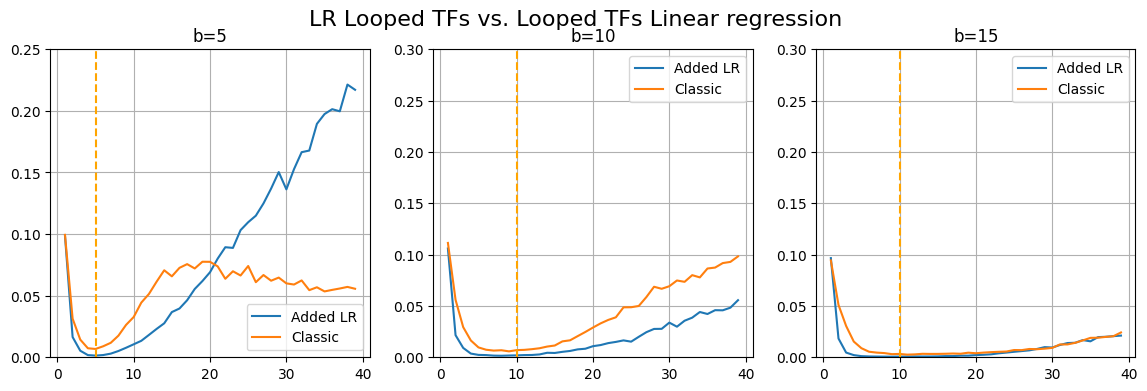

In [35]:
# Compare different results in one plot
fig, axs = plt.subplots(1, 3, figsize=(14,4))

fig.suptitle('LR Looped TFs vs. Looped TFs Linear regression', fontsize=16)

axs[0].set_title("b=5")
axs[0].plot(steps_b5, values_b5)
axs[0].plot(steps_b5_st, values_b5_st)
axs[0].set_ylim([0, 0.25])
axs[0].grid()
axs[0].axvline(x = 5, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[0].legend(["Added LR", "Classic"])

axs[1].set_title("b=10")
axs[1].plot(steps_b10, values_b10)
axs[1].plot(steps_b10_st, values_b10_st)
axs[1].set_ylim([0, 0.3])
axs[1].grid()
axs[1].axvline(x = 10, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[1].legend(["Added LR", "Classic"])

axs[2].set_title("b=15")
axs[2].plot(steps_b15, values_b15)
axs[2].plot(steps_b15_st, values_b15_st)
axs[2].set_ylim([0, 0.3])
axs[2].grid()
axs[2].axvline(x = 10, color = 'orange', label = 'axvline - full height', linestyle='dashed')
axs[2].legend(["Added LR", "Classic"])

fig.savefig("../images/experiment_lr_looped_tf.png")

Let's compare two methods

In [31]:
#delta b5
delta_b5 = abs(values_b5[4] - values_b5_st[4])
delta_b5, values_b5[4], values_b5_st[4]

(0.005370663727323215, 0.0013792239874601364, 0.006749887714783351)

In [33]:
#delta b10
delta_b10 = abs(values_b10[9] - values_b10_st[9])
delta_b10, values_b10[9], values_b10_st[9]

(0.005098624850312868, 0.001855752095580101, 0.006954376945892969)

In [34]:
#delta b15
delta_b15 = abs(values_b15[14] - values_b15_st[14])
delta_b15, values_b15[14] , values_b15_st[14]

(0.0024219265269736444, 0.0008618798541526, 0.0032838063811262445)

In [56]:
#Code for running average

def calculate_running_average(steps, vals: np.array, smooth:int):
    steps_ra = steps[smooth // 2-1: -smooth // 2]
    vals_ra = np.convolve(vals, np.ones(smooth)/ smooth, mode='valid')
    return steps_ra, vals_ra

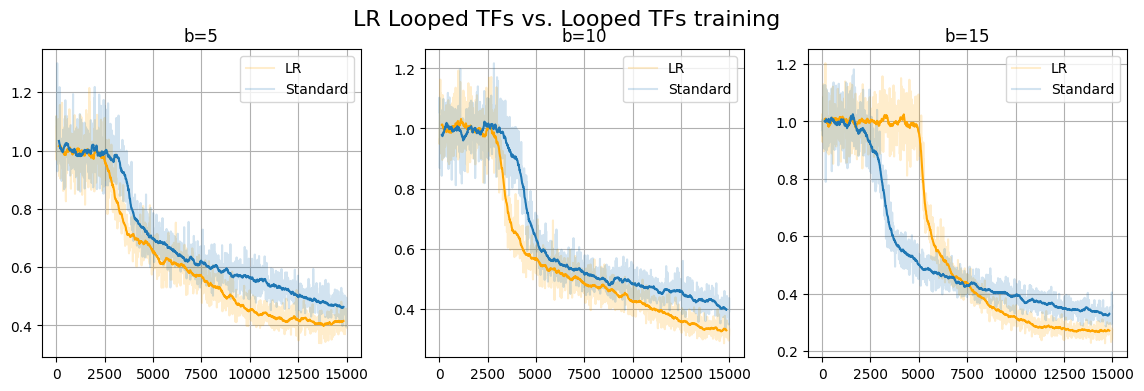

In [73]:
#Loss plots

smoothness = 30
fig, axs = plt.subplots(1, 3, figsize=(14,4))

fig.suptitle('LR Looped TFs vs. Looped TFs training', fontsize=16)

steps = list((range(0, len(metrics_l1_b5) * 10, 10)))

b5_loss = np.array([m["scaled_loss"] for m in metrics_l1_b5])
b5_st_loss = np.array([m["scaled_loss"] for m in metrics_l1_b5_st])

axs[0].set_title("b=5")
axs[0].plot(steps, b5_loss, alpha = 0.2, color = 'orange')
axs[0].plot(steps, b5_st_loss, alpha = 0.2, color = '#1f77b4')
axs[0].plot(*calculate_running_average(steps, b5_loss, smoothness), color = 'orange')
axs[0].plot(*calculate_running_average(steps, b5_st_loss, smoothness), color = '#1f77b4')
axs[0].grid()
axs[0].legend(["LR", "Standard"])

b10_loss = np.array([m["scaled_loss"] for m in metrics_l1_b10])
b10_st_loss = np.array([m["scaled_loss"] for m in metrics_l1_b10_st])

axs[1].set_title("b=10")
axs[1].plot(steps, b10_loss, alpha = 0.2, color = 'orange')
axs[1].plot(steps, b10_st_loss, alpha = 0.2, color = '#1f77b4')
axs[1].plot(*calculate_running_average(steps, b10_loss, smoothness), color = 'orange')
axs[1].plot(*calculate_running_average(steps, b10_st_loss, smoothness), color = '#1f77b4')
axs[1].grid()
axs[1].legend(["LR", "Standard"])

b15_loss = np.array([m["scaled_loss"] for m in metrics_l1_b15])
b15_st_loss = np.array([m["scaled_loss"] for m in metrics_l1_b15_st])

axs[2].set_title("b=15")
axs[2].plot(steps, b15_loss, alpha = 0.2, color = 'orange')
axs[2].plot(steps, b15_st_loss, alpha = 0.2, color = '#1f77b4')
axs[2].plot(*calculate_running_average(steps, b15_loss, smoothness), color = 'orange')
axs[2].plot(*calculate_running_average(steps, b15_st_loss, smoothness), color = '#1f77b4')
axs[2].grid()
axs[2].legend(["LR", "Standard"])

fig.savefig("../images/experiment_lr_looped_tf_train_loss.png")